In [1]:
from astropy.io import fits
from astropy.table import Table, Column, hstack, vstack
import pdb, glob
import numpy as np
import rafias_lib as rl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## General

In [2]:
test = ['clr1', 'clr2', 'clr3', 'clr4', 'clr5', 'clr6', 'full1', 'full2', 'full3', 'full4', 'full5', 'fullQ', 
        'sub320', 'sub640']

In [29]:
def get_stdev(res_data1, res_data2, time):
    detrended_flux1 = rl.linear_bestfit(time, res_data1, 0.00002, 1)
    detrended_flux2 = rl.linear_bestfit(time, res_data2, 0.00002, 1)
    av_det_res_flux = (detrended_flux1+detrended_flux2)/2
    stdev = np.std(av_det_res_flux)
    return stdev

## Clearsubs

In [38]:
a1_files_clr = []
for n in ['1', '2', '3', '4', '5', '6']:
    a1_files_clr.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB'+n+'*_481_SE_2016-*/*.slp.fits')))

In [39]:
b4_files_clr = []
for n in ['1', '2', '3', '4', '5', '6']:
    b4_files_clr.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB'+n+'*_489_SE_2016-*/*.slp.fits')))

In [40]:
a1_centers_clr = []
for ds in a1_files_clr:
    a1_centers_clr.append(rl.gen_center_g2d(164,161,5,3500,2,2,0,ds))

In [41]:
b4_centers_clr = []
for ds in b4_files_clr:
    b4_centers_clr.append(rl.gen_center_g2d(160,155,5,4500,2,2,0,ds))

In [42]:
a1_data_clr = []
for x in range(1,7):
    globals()['a1_data_clr%s' % x] = rl.time_series(a1_centers_clr[x-1][1], a1_centers_clr[x-1][2],
                                                    a1_files_clr[x-1], 3, 9, 10)
    a1_data_clr.append(globals()['a1_data_clr%s' % x])

In [43]:
b4_data_clr = []
for x in range(1,7):
    globals()['b4_data_clr%s' % x] = rl.time_series(b4_centers_clr[x-1][1], b4_centers_clr[x-1][2], 
                                                    b4_files_clr[x-1], 3, 9, 10)
    b4_data_clr.append(globals()['b4_data_clr%s' % x])

In [44]:
av_data_clr = []
for x in range(1,7):
    globals()['av_data_clr%s' % x] = (a1_data_clr[x-1]['res_flux']+b4_data_clr[x-1]['res_flux'])/2 
    av_data_clr.append(globals()['av_data_clr%s' % x])

In [ ]:
stdev_clr = Table(names = ('Test Name', 'NGROUP', 'RMS', 'Error in RMS'), dtype=('S4', 'i4', 'f8', 'f8'))
for i, files in enumerate(a1_files_clr):
    #rms
    st_dev = get_stdev(a1_data_clr[i]['res_flux'], b4_data_sub[i]['res_flux'], a1_data_sub[i]['time'])
    header = rl.test_image(files[5])[2]
    ngroup = header['NGROUP']
    #error in rms
    a1_error = rl.norm_flux_error(a1_data_clr[i]['res_flux'], 2.2, a1_files_clr[i])
    b4_error = rl.norm_flux_error(b4_data_clr[i]['res_flux'], 2.5, b4_files_clr[i])
    av_error = 0.5*(np.sqrt(np.square(a1_error)+np.square(b4_error)))
    error = (np.median(av_error)*1e6)/np.sqrt(len(av_error))
    
    stdev_clr.add_row([test[i], ngroup, st_dev*1e6, error])
stdev_clr

## Full

In [13]:
a1_files_full = []
for n in ['1', '2', '3', '4', '5', 'Q']:
    a1_files_full.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL'+n+'-*_1_481_SE_*/*.red.fits')))

In [14]:
b4_files_full = []
for n in ['1', '2', '3', '4', '5', 'Q']:
    b4_files_full.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL'+n+'-*_1_489_SE_*/*.red.fits')))

In [15]:
a1_centers_full = []
for ds in a1_files_full:
    a1_centers_full.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True))

In [16]:
b4_centers_full = []
for ds in b4_files_full:
    b4_centers_full.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True))

In [17]:
a1_data_full = []
for x in range(1,7):
    globals()['a1_data_full%s' % x] = rl.time_series(a1_centers_full[x-1][1], a1_centers_full[x-1][2], 
                                                     a1_files_full[x-1], 70, 72, 80, red = True)
    a1_data_full.append(globals()['a1_data_full%s' % x])

In [18]:
b4_data_full = []
for x in range(1,7):
    globals()['b4_data_full%s' % x] = rl.time_series(b4_centers_full[x-1][1], b4_centers_full[x-1][2], 
                                                     b4_files_full[x-1], 70, 72, 80, red = True)
    b4_data_full.append(globals()['b4_data_full%s' % x])

In [19]:
av_data_full = []
for x in range(1,7):
    globals()['av_data_full%s' % x] = (a1_data_full[x-1]['res_flux']+b4_data_full[x-1]['res_flux'])/2 
    av_data_full.append(globals()['av_data_full%s' % x])

In [35]:
stdev_full = Table(names = ('Test Name', 'NGROUP', 'RMS', 'Error in RMS'), dtype=('S5', 'i4', 'f8', 'f8'))
for i, files in enumerate(a1_files_full):
    
    st_dev = np.std(av_data_full[i][3:]/np.median(av_data_full[i][3:]))
    header = rl.test_image(files[5])[2]
    ngroup = header['NGROUP']
    
    a1_error = rl.norm_flux_error(a1_data_full[i]['res_flux'], 2.2, a1_files_full[i])
    b4_error = rl.norm_flux_error(b4_data_full[i]['res_flux'], 2.5, b4_files_full[i])
    av_error = 0.5*(np.sqrt(np.square(a1_error)+np.square(b4_error)))
    error = (np.median(av_error)*1e6)/np.sqrt(len(av_error))
    
    stdev_full.add_row([test[i+6], ngroup, st_dev*1e6, error])
stdev_full

Test Name,NGROUP,RMS,Error in RMS
str5,int32,float64,float64
full1,2,1519.44586346,3.50702477289
full2,2,1709.69691753,3.50740427745
full3,2,1961.10887829,3.5123294253
full4,2,1355.9341994,3.52160362747
full5,2,1230.2254514,5.01679415813
fullQ,2,1742.75256569,7.09287037432


## Sub

In [3]:
a1_files_sub = []
for n in ['-', '640-']:
    a1_files_sub.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB'+n+'60*_1_481_SE_*/*.slp.fits')))

In [4]:
b4_files_sub = []
for n in ['-','640-']:
    b4_files_sub.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              '/NRCN821WLP8SUB'+n+'60*_1_489_SE_*/*.slp.fits')))

In [5]:
a1_centers_sub = []
for i, ds in enumerate(a1_files_sub):
    if i == 0:
        a1_centers_sub.append(rl.gen_center_g2d(166,160,5,400,2,2,0,ds))
    else:
        a1_centers_sub.append(rl.gen_center_g2d(326,320,5,400,2,2,0,ds))

In [34]:
b4_centers_sub = []
for i, ds in enumerate(b4_files_sub):
    if i == 0:
        b4_centers_sub.append(rl.gen_center_g2d(162,156,5,500,2,2,0,ds))
    else:
        b4_centers_sub.append(rl.gen_center_g2d(319,316,5,500,2,2,0,ds))

In [7]:
a1_data_sub = []
for x in range(1,3):
    globals()['a1_data_sub%s' % x] = rl.time_series(a1_centers_sub[x-1][1], a1_centers_sub[x-1][2], 
                                                     a1_files_sub[x-1], 70, 72, 80)
    a1_data_sub.append(globals()['a1_data_sub%s' % x])

In [35]:
b4_data_sub = []
for x in range(1,3):
    globals()['b4_data_sub%s' % x] = rl.time_series(b4_centers_sub[x-1][1], b4_centers_sub[x-1][2], 
                                                     b4_files_sub[x-1], 70, 72, 80)
    b4_data_sub.append(globals()['b4_data_sub%s' % x])

In [9]:
av_data_sub = []
for x in range(1,3):
    globals()['av_data_sub%s' % x] = (a1_data_sub[x-1]['res_flux']+b4_data_sub[x-1]['res_flux'][:306])/2 
    av_data_sub.append(globals()['av_data_sub%s' % x])

In [27]:
detrended_flux1 = rl.linear_bestfit(a1_data_sub1['time'], a1_data_sub1['res_flux'], 0.00002, 1)
detrended_flux2 = rl.linear_bestfit(b4_data_sub1['time'][:306], b4_data_sub1['res_flux'][:306], 0.00002, 1)
av_det_res_flux = (detrended_flux1+detrended_flux2)/2
np.std(av_det_res_flux)

0.00049954878867065184

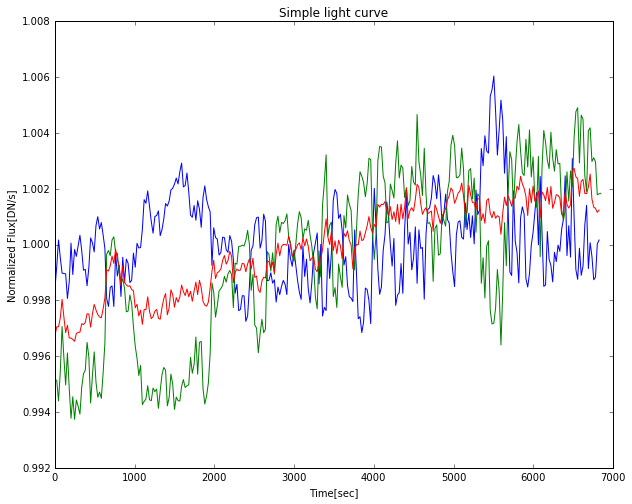

In [17]:
rl.light_curve(a1_data_sub1['time'], a1_data_sub1['res_flux'], style = '-')
rl.light_curve(b4_data_sub1['time'], b4_data_sub1['res_flux'], style = 'g-')
rl.light_curve(a1_data_sub1['time'], av_data_sub1, style = 'r-')

In [37]:
stdev_sub = Table(names = ('Test Name', 'NGROUP', 'RMS', 'Error in RMS'), dtype=('S6', 'i4', 'f8', 'f8'))
for i, files in enumerate(a1_files_sub):
    
    st_dev = get_stdev(a1_data_sub[i]['res_flux'], b4_data_sub[i]['res_flux'][:306], a1_data_sub[i]['time'])
    header = rl.test_image(files[5])[2]
    ngroup = header['NGROUP']
    
    a1_error = rl.norm_flux_error(a1_data_sub[i]['res_flux'], 2.2, a1_files_sub[i])
    b4_error = rl.norm_flux_error(b4_data_sub[i]['res_flux'], 2.5, b4_files_sub[i])
    av_error = 0.5*(np.sqrt(np.square(a1_error)+np.square(b4_error[:306])))
    error = (np.median(av_error)*1e6)/np.sqrt(len(av_error))
    
    stdev_sub.add_row([test[i+12], ngroup, st_dev*1e6, error])
stdev_sub

Test Name,NGROUP,RMS,Error in RMS
str6,int32,float64,float64
sub320,20,499.548788671,3.023877696
sub640,6,1197.02728225,6.30467776622


## Results

In [37]:
all_test_std = vstack([stdev_clr, stdev_full, stdev_sub])
all_test_std

Test Name,NGROUP,RMS,Error in RMS
str6,int32,float64,float64
clr1,3,2513.05772647,148.94371793
clr2,3,2388.57613272,148.513917617
clr3,3,2374.41464553,149.155823121
clr4,3,2680.91156766,148.798354341
clr5,3,2220.09672255,148.897850829
clr6,3,2331.85451648,148.69308206
full1,2,1519.44586346,3.50702477289
full2,2,1709.69691753,3.50740427745
full3,2,1961.10887829,3.5123294253


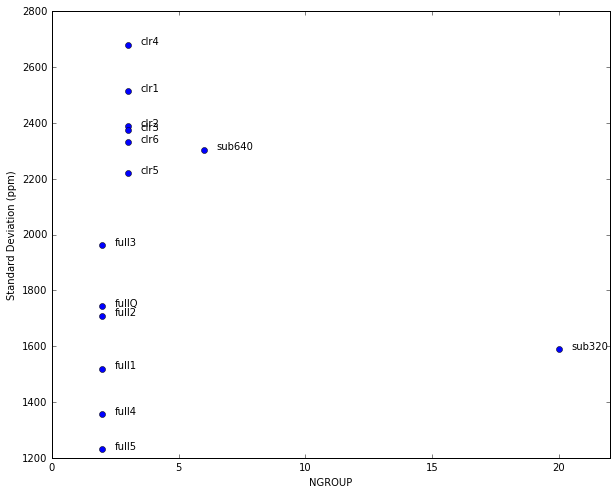

In [39]:
x = all_test_std['NGROUP']
y = all_test_std['RMS']
plt.plot(x, y, 'o')
plt.xlim(0, 22)
plt.xlabel("NGROUP")
plt.ylabel("Standard Deviation (ppm)")
for i in range(0,14):
    plt.annotate(test[i], xy = (x[i], y[i]), xytext =(x[i] + 0.5, y[i]))